<a href="https://colab.research.google.com/github/firas-chakroun/Formation/blob/main/Data_Analysis_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 : Data Wrangling

### Welcome!

By the end of this notebook, you will have learned the basics of Data Wrangling!

## Table of content

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref1">Identify and handle missing values</a>
<ul><div><a href="#ref2">- Identify missing values</a></div>
<div><a href="#ref3">- Deal with missing values</a></div>
<div><a href="#ref4">- Correct data format</a></div></ul></li>
<p></p>
<li><a href="#ref5">Data standardization</a></li>
<li><a href="#ref6">Data Normalization (centring/scaling)</a></li>
<li><a href="#ref7">Binning</a></li>
<li><a href="#ref8">Indicator variable</a></li>
<p></p>
Estimated Time Needed: <strong>30 min</strong>
</div>

<hr>

## What is the purpose of Data Wrangling?

Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

### What is the fuel consumption (L/100k) rate for the disel car?

### Import data

You can find the "Automobile Data Set" from the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data. We will be using this data set throughout this course.


#### Import pandas

In [ ]:
import pandas as pd

## Reading the data set from the URL and adding the related headers.

#### URL of dataset

In [ ]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

#### Python list "headers" containing name of headers

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use the Pandas method **read_csv()** to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".

In [ ]:
df = pd.read_csv(filename, names = headers)

 Use the method **head()** to display the first five rows of the dataframe.

In [ ]:
# To see what the data set looks like, we'll use the head() method.
df.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.
<div>So, how do we identify all those missing values and deal with them?</div>


**How to work with missing data?**

Steps for working with missing data:
1. identify missing data
2. deal with missing data
3. correct data format

<a id="ref1"></a>
# 1. Identify and handle missing values


<a id="ref2"></a>
### Convert "?" to NaN
In car dataset, missing data comes with the question mark "?".
We replace "?" to NaN (Not a Number), which is Python's default missing value marker for reasons of computational speed and convenience. Here we use function:
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B

In [ ]:
print(type(np.nan))

<class 'float'>


In [ ]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Evaluating for Missing Data

The missing values are converted to Python's default . We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
1.  **.isnull()**
2.  **.notnull()**

The output is a boolean value indicating whether the passed in argument value are in fact missing data.


In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.

### Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_couts()"  counts the number of "True" values.

In [ ]:
print(missing_data['price'].value_counts())

False    201
True       4
Name: price, dtype: int64


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [ ]:
df['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

1. "normalized-losses": 41 missing data
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. "price": 4 missing data

<a id="ref3"></a>
## Deal with missing data
**How to deal with missing data?**

    
    1. drop data
        a. drop the whole row
        b. drop the whole column
    2. replace data
        a. replace it by mean
        b. replace it by frequency
        c. replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

**Replace by mean:**

    "normalized-losses": 41 missing data, replace them by mean
    "stroke": 4 missing data, replace them by mean
    "bore": 4 missing data, replace them by mean
    "horsepower": 2 missing data, replace them by mean
    "peak-rpm": 2 missing data, replace them by mean
    
**Replace by frequency:**

    "num-of-doors": 2 missing data, replace them with "four".
        * Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to
    

**Drop the whole row:**

    "price": 4 missing data, simply delete the whole row
        * Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore they are not useful to us

#### Calculate the average of the column

In [ ]:
avg_1 = df["normalized-losses"].astype("float").mean(axis = 0)

#### Replace "NaN" by mean value in "normalized-losses" column

In [ ]:
df["normalized-losses"].replace(np.nan, avg_1, inplace = True)

#### Calculate the mean value for 'bore' column

In [ ]:
avg_2=df['bore'].astype('float').mean(axis=0)

#### Replace NaN by mean value

In [ ]:
df['bore'].replace(np.nan, avg_2, inplace= True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>According to the example above, replace NaN in "stroke" column by mean.</b>
</div>

In [ ]:
avg_3=df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan,avg_3,inplace=True)

In [ ]:
avg_3

3.2533658536585364

In [ ]:
df['stroke']

0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: object

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1 Answer: </h1>
<b>Run the code below! Did you get the right code?</b>
</div>

  <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q1" class="collapse">
```
# calculate the mean vaule for "stroke" column
avg_3 = df["stroke"].astype("float").mean(axis = 0)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_3, inplace = True)
```
</div>



0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

#### Calculate the mean value for the  'horsepower' column:

In [ ]:
avg_4=df['horsepower'].astype('float').mean(axis=0)

#### Replace "NaN" by mean value :

In [ ]:
df['horsepower'].replace(np.nan, avg_4, inplace= True)

#### Calculate the mean value for 'peak-rpm' column:

In [ ]:
avg_5=df['peak-rpm'].astype('float').mean(axis=0)

#### Replace NaN by mean value:

In [ ]:
df['peak-rpm'].replace(np.nan, avg_5, inplace= True)

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [ ]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
df['price'].value_counts()

8921.0     2
18150.0    2
8845.0     2
8495.0     2
7609.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 186, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [ ]:
df['num-of-doors'].value_counts().idxmax()

'four'

The replacement procedure is very similar to what we have seen previously

In [ ]:
#replace the missing 'num-of-doors' values by the most frequent
df["num-of-doors"].replace(np.nan, "four", inplace = True)

Finally, let's drop all rows that do not have price data:

In [ ]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

In [ ]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Good!** Now, we obtain the dataset with no missing values.

<a id="ref4"></a>
## Correct  data format
**We are almost there!**

After working with missing data,
<div>The last step in data cleaning is checking and making sure that all data is in correct format (int, float, text or other).</div>

In Pandas, we use
<div>**.dtype()** to check the data type</div>
<div>**.astype()** to change the data type</div>

#### Lets list the data types for each column

In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not in correct data type. Numerical variables should have type 'float' or 'int', and variables with strings as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.  

#### Convert data types to proper format

In [ ]:

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")


#### Let us list the columns after the conversion  

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Wonderful!**

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.
<div>The cleaned dataset we prepared for any further analysis later.</div>

<a id="ref5"></a>
# Data Standardization
Data are usually collected from different agencies with different formats.

**What is Standardization?**
<div>Standardization is the process of transforming data into a common format which allows researcher to make meaningful comparison.
</div>

**Example**
<div>Transform mpg to L/100km:</div>
<div>In our dataset, the fuel consupmtion columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard</div>
<div>We will need to apply **data transformation** to transform mpg into L/100km?</div>

The formula for unit conversion is
L/100km = 235 / mpg
<div>We can do many mathematical operations directly in Pandas.</div>

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [ ]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg", and change the name of column to "highway-L/100km".</b>
</div>

In [ ]:
df["highway-mpg"] = 235/df["highway-mpg"]

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #2 Answer: </h1>
<b>Run the code below! Did you get the right code?</b>
</div>

 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2" class="collapse">
```
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data
df.head()
```
</div>



<a id="ref6"></a>
# Data Normalization

**Why normalization?**
<div>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling variable so the variable values range from 0 to 1
 </div>

**Example**
<div>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height" </div>
<div>**Target:** we would like to normalizate those variables so their value range from 0 to 1.</div>
<div>**Approach:** replace origianl value by (original value)/(maximum value)</div>

In [ ]:
# replace (origianl value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max() # df['length'] = df['length']/(df['length'].max()- df['length'].min()-1 )
df['width'] = df['width']/df['width'].max()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Questiont #3: </h1>

<b>According to the example above, normalize the column "height".</b>
</div>

In [ ]:
df['height'] = df['height']/df['height'].max()


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3 Answer: </h1>
<b>Run the code below! Did you get the right code?</b>
</div>

<div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q3" class="collapse">
```
df['height'] = df['height']/df['height'].max()
# show the scaled columns
df[["length","width","height"]].head()

```
</div>


Here we can see, we've normalized "length", "width" and "height" in the range of [0,1].

<a id="ref7"></a>
#  Binning
**Why binning?:**
<div>Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
 </div>

**Example:**
<div>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288,  it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three  'bins' to simplify analysis? </div>

<div>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins <div>

## Example of Binning Data In Pandas

#### Convert data to correct format

In [ ]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)

#### We would like four bins of equal size bandwidth,the forth is becase the function "cut"  include the rightmost edge:

In [ ]:
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
binwidth

53.5

 We build a bin array, from a minimum value to a maximum value, with bandwidth calculated above.  The bins will be values used to determine when one bin ends and another begins.

In [ ]:
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)

In [ ]:
bins

array([ 48. , 101.5, 155. , 208.5])

#### We set group or names.

In [ ]:
group_names = ['Low', 'Medium', 'High']

#### We apply the function "cut" the determine what each value of "df['horsepower']" belongs to.

In [ ]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High").
<div>We successfully narrow the intervals from 57 to 3!</div>

## Bins visualization
Normally, a histogram is used to visulize the distribution of bins we created above.

Text(0.5, 1.0, 'horsepower bins')

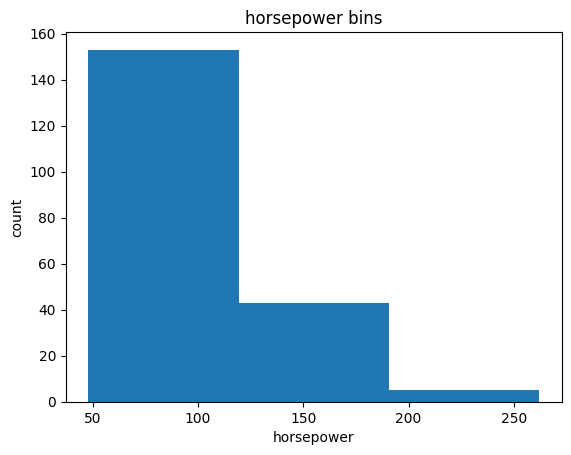

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [ ]:
df['horsepower-binned'].value_counts()

Low       115
Medium     62
High       23
Name: horsepower-binned, dtype: int64

In [ ]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,3.330692,3.254776,10.164279,103.405534,5117.665368,25.179104,8.044957,13207.129353,9.944145,NaN
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,0.268072,0.316402,4.004965,37.365700,478.113805,6.423220,1.840739,7947.066342,2.534599,NaN
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,NaN
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,NaN
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,NaN
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,NaN


The plot above shows the binning result for attribute "horsepower".

<a id="ref8"></a>
# Indicator variable (or dummy variable)
**What is indicator variable?**
<div>An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. </div>

**Why we use indicator variable?**
<div>So we can use catogorical variables for regression analysis in later modules.</div>

**Example**
<div>We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. In order to use this attribute in regression analysis, we convert "fuel-type" into indicator variable.</div>

<div>We will use the pandas method 'get_dummies' to assign numerical values to different categories of fuel type. <div>

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [ ]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])

In [ ]:
dummy_variable_1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [ ]:
# get indicator variables and assign it to data frame "dummy_variable_1"
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
# change column names for clarity
dummy_variable_1.rename(columns={'fuel-type-gas':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset

In [ ]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,13495.0,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,16500.0,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154.0,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102.0,5500.0,24,30,13950.0,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,18,22,17450.0,Medium,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>As above, create indicator variable to the column of "aspiration": "std" to 0, while "turbo" to 1.</b>
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #4 Answer: </h1>
<b>Run the code below! Did you get the right code?</b>
</div>

<div align="right">
<a href="#q4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q4" class="collapse">
```
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()
```
</div>



 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe then drop the column 'aspiration'</b>
</div>

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #5 Answer: </h1>
<b>Run the code below! Did you get the right code?</b>
</div>

 <div align="right">
<a href="#q5" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q5" class="collapse">
```
#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)
```
</div>









 save the new csv

In [ ]:
df.to_csv('clean_df.csv')